## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 17
---------------------------------------

GOALS:

1. Do a full analysis and model of Bike Rentals in DC
2. Engage in EDA plus predictive modeling and interpretation

----------------------------------------------------------

This homework has **12 Problems** and **2 Challenge Problems**

In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

## Data Bike Sharing

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.
Through these systems, user is able to easily rent a bike from a particular position and return back at another position.
Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles.
Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research.
Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems.
This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city.
Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Source: [UCI Machine Learning Repository - Bike Sharing Dataset](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

The data include daily bike rental counts (by members and casual users) of Capital Bikeshare in Washington, DC in 2011 and 2012 as well as weather information on these days.
The original data sources are <http://capitalbikeshare.com/system-data> and <http://www.freemeteo.com>.

In [97]:
# Load the Data
#file_location = 'https://joannabieri.com/introdatascience/data/bikeshare-day.csv'
file_location = 'data/bikeshare-day.csv'
DF_raw = pd.read_csv(file_location)

In [98]:
show(DF_raw)

Loading ITables v2.5.2 from the internet... (need help?)


## Data wrangling and Preprocessing

First - check out the codebook to make sure you understand the variables in the data set:

[UCI Machine Learning Repository - Bike Sharing Dataset](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

1.  Recode the season variable to be categorical with meaningful level names as outlined in the codebook, with spring as the baseline level.

2.  Recode the binary variables holiday and workingday to categorical with levels no (0) and yes (1), with no as the baseline level.

3.  Recode the yr variable to be categorical with levels 2011 and 2012, with 2011 as the baseline level.

4.  Recode the `weathersit` variable as 1 - clear, 2 - mist, 3 - light precipitation, and 4 - heavy precipitation.

------------------------------------
**NOTE** Remember recode means to change the data to a new format. Here we are changing numbers into strings. Then we want to tell Python which order the categories are in. Here is the code for the first one:

    DF['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'},inplace=True)
    DF['season'] = pd.Categorical(DF['season'], categories=['spring','summer','fall','winter'], ordered=True)
    
------------------------------------

5.  Calculate raw temperature, feeling temperature, humidity, and windspeed as their values given in the dataset multiplied by the maximum raw values stated in the codebook for each variable.  Here, instead of writing over the existing variables, create new ones (new columns) with concise but informative names.

------------------------------------
**Example calculate raw temperature**

How do I do this? The codebook (page 2) says that temperature was calculated using 

    (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39

putting this into an equation:

$$t_{data} = (t-t_{min})/(t_{max}-t_{min})$$

where $t_{min}=-8$, $t_{max}=+39$. So I can solve for temperature $t$

$$ t = t_{data}*(t_{max} - t_{min}) + t_{min} $$

or in code

    DF['raw_temp'] = DF['temp']*(39-(-8)) + (-8)

-----------------------------------------------

6. Look at what is in your final data frame. Do your values make sense for temperature, humidity, and windspeed?

7.  Data Sanity Check - check that the sum of `casual` and `registered` adds up to `cnt` for each record.
    **Hint:** One way of doing this is to create a new column that adds up the `casual` and `registered` columns. Then create a mask to see if your new column is equal to the count 'cnt' column. If you sum(mask) it will add up the number of Trues in the mask.
    But this is only one way, you might come up with another.

In [99]:
# Get a copy of the data
DF = DF_raw.copy()
DF

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [100]:
# Recode the season
DF['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'}, inplace=True)
DF['season'] = pd.Categorical(DF['season'], categories=['spring','summer','fall','winter'], ordered=True)
show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


In [101]:
# Recode the others
DF['holiday'].replace({0:'no',1:'yes'}, inplace=True)
DF['holiday'] = pd.Categorical(DF['holiday'], categories=['no','yes'],ordered = True)

DF['workingday'].replace({0:'no',1:'yes'}, inplace=True)
DF['workingday'] = pd.Categorical(DF['workingday'], categories=['no','yes'],ordered = True)

DF['yr'].replace({0:'2011',1:'2012'}, inplace=True)
DF['yr'] = pd.Categorical(DF['yr'], categories=['2011','2012'],ordered = True)

DF['weathersit'].replace({1:'clear', 2:'mist', 3:'light_precipitation', 4:'heavy_precipitation'},inplace=True)
DF['weathersit'] = pd.Categorical(DF['weathersit'], categories=['clear','mist','light_precipitation','heavy_precipitation'],ordered = True)

show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


In [102]:
# Calculate the raw temperature
DF['raw_temp'] = DF['temp']*(39-(-8)) + (-8)

DF['araw_temp'] = DF['atemp']*(39-(-8)) + (-8)
show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


In [103]:
# Calculate the other raw values
DF['humidity'] = DF['hum']*100
DF['WindSpeed'] = DF['windspeed']*67

DF['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dex'},inplace=True)
DF['mnth'] = pd.Categorical(DF['mnth'], categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],ordered = True)

DF['weekday'].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'},inplace=True)
DF['weekday'] = pd.Categorical(DF['weekday'], categories=['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],ordered = True)

show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


In [104]:
# Check the sum
DF['sum'] = DF['casual'] + DF['registered']

mask = DF['sum'] == DF['cnt']
print(mask.sum(), " VS " , len(DF))
show(DF)

731  VS  731


Loading ITables v2.5.2 from the internet... (need help?)


## Exploratory data analysis

8.  Recreate the following visualization, and interpret it in context of the data. **Hint:** You will need to use one of the variables you created above. The temperature plotted is the feeling temperature. To get a nice title on the color bar I used:

        fig.update_layout(coloraxis_colorbar_title='Feeling Temperature (C)')

![Bike Rental](images/BikeRentalTemp.jpg)

9.  Create a visualization displaying the relationship between bike rentals and season. Interpret the plot in context of the data.

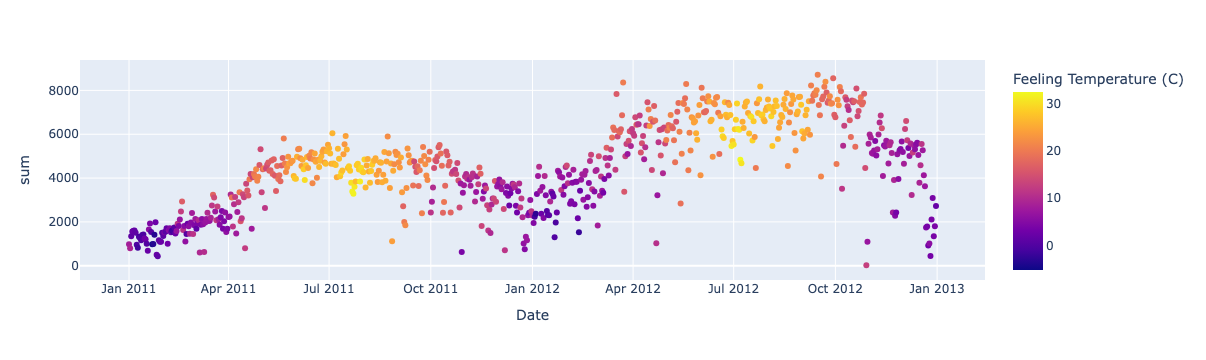

In [105]:
# Visualization - recreate the graph
fig = px.scatter(DF, x='dteday',
                 y='sum',
                color='raw_temp')

fig.update_layout(xaxis_title='Date',
                  coloraxis_colorbar_title='Feeling Temperature (C)')

fig.show()

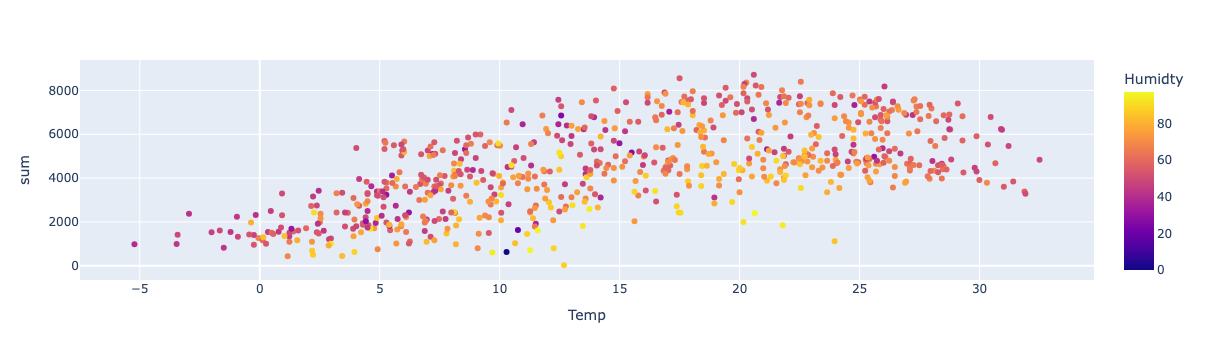

In [106]:
# Visualization - do your own thing
fig = px.scatter(DF, x='raw_temp',
                 y='sum',
                color='humidity')

fig.update_layout(xaxis_title='Temp',
                  coloraxis_colorbar_title='Humidty')

fig.show()

## Modeling

10.  Fit a linear model predicting total daily bike rentals from daily temperature.
    Write the linear model, interpret the slope and the intercept in context of the data, and determine and interpret the $R^2$.

10. Fit another linear model predicting total daily bike rentals from daily feeling temperature.
    Write the linear model, interpret the slope and the intercept in context of the data, and determine and interpret the $R^2$.
    Is temperature or feeling temperature a better predictor of bike rentals?
    Explain your reasoning.

11. Fit a model predicting total daily bike rentals from workingday, temperature (raw and feeling), holiday, and an interaction term between holiday and raw temperature (raw_temp * holiday_no). Use the **.get_dummies()** function to get dummy variables for the categorical data. Plot the residual of your prediction.

NOTE - in this case you won't be able to directly 2D scatter plot the results because you have too many variables. But you can still think of a way to visualize this fit...eg 3D scatter with facets or colors.


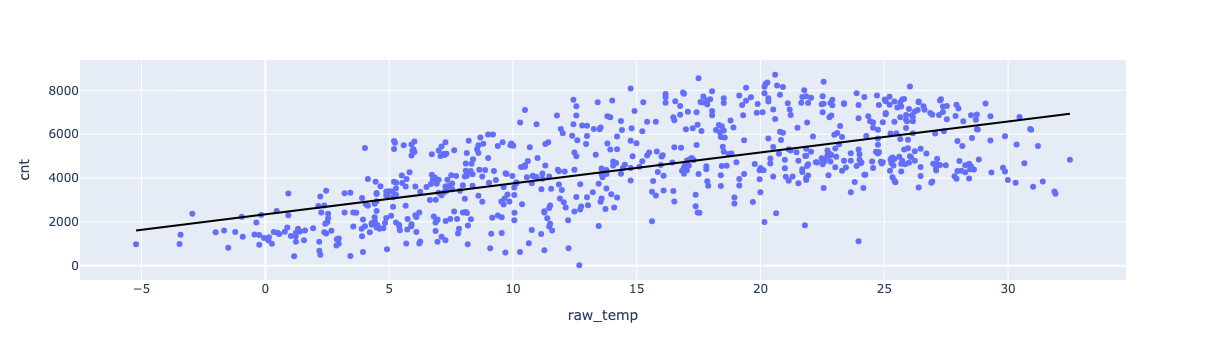

In [107]:
# Linear model cnt vs raw_temp
lin = DF[['cnt', 'raw_temp']]

X = lin['raw_temp'].values.reshape(-1,1)
y = lin['cnt']

LM = LinearRegression()
LM.fit(X,y)

lin['prediction'] = LM.predict(X)
fig = px.scatter(lin,x='raw_temp',y='cnt')

fig.add_trace(px.line(lin,x='raw_temp',y='prediction',color_discrete_sequence=['black']).data[0])

fig.show()

In [108]:
print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

#We expect an increase of 141 people to rent a bike for each degree and expect 2344 rentals on a day at 0 C

[141.2917021]
2344.975735803636
0.3937487313729241


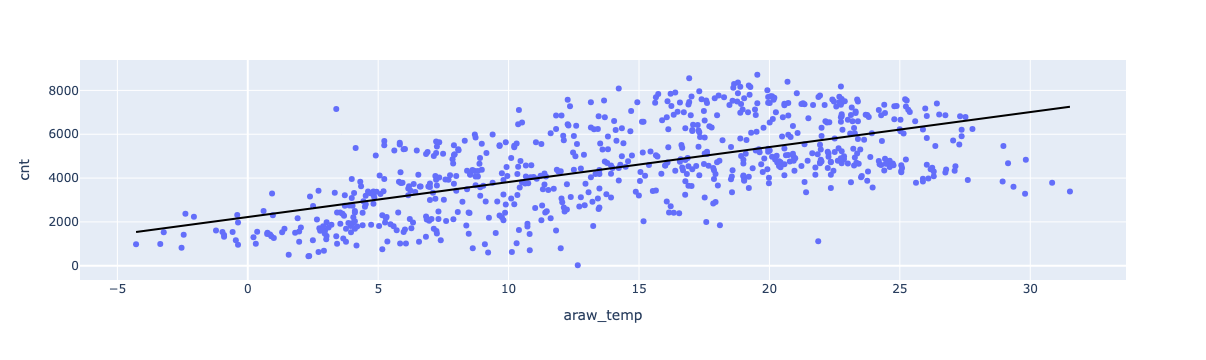

In [109]:
# Redo - linear model cnt vs feeling_temp
lin = DF[['cnt', 'araw_temp']]

X = lin['araw_temp'].values.reshape(-1,1)
y = lin['cnt']

LM = LinearRegression()
LM.fit(X,y)

lin['prediction'] = LM.predict(X)
fig = px.scatter(lin,x='araw_temp',y='cnt')

fig.add_trace(px.line(lin,x='araw_temp',y='prediction',color_discrete_sequence=['black']).data[0])

fig.show()

In [110]:
print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

#We expect an increase of 159 people to rent a bike for each degree and expect 2222 rentals on a day at 0 C of feeling temp. We would expect more people to come in dpeending onf the feeling temp

[159.61348829]
2222.731887399172
0.39824391752613697


In [112]:
# Multivariable model with dummies - cnt from workingday, temperature (raw and feeling), holiday, and an interaction term
DF = pd.get_dummies(lin,columns=['workingday'],dtype = object)

KeyError: "None of [Index(['workingday'], dtype='object')] are in the [columns]"

### Interpretation

$$y = b0 + b1*(raw temp) + b2*(feeling temp) + b3*(holiday no) - b4(holiday yes) - b5*(workingday no) + b6*(workinday yes) + b7(raw temp * holiday no)$$

In [15]:
# Calculate the adjusted R^2 


**Challenge** Fit a model predicting total daily bike rentals from season, year, whether the day is holiday or not, whether the day is a workingday or not, the weather category, temperature, feeling temperature, humidity, and windspeed, as well as the interaction between feeling temperature and holiday.

**IMPORTANT** When you use get dummies you are going to have a lot of variables! I always look at the resulting columns and copy and paste, then count how many variables I have.

Record **adjusted** $R^2$ of the model and discuss: Is it a better model than the ones above?

NOTE - you will not be able to plot the prediction, because you have too many dimensions in the data, but you can still plot the residual!


**Interpretation**

**Challenge** Write down the linear models for holidays and non-holidays. Use the coefficients and intercepts from your multivariable model above, you might want to do some algebra to simplify. Remember we are comparing holiday to non-holiday **all else held constant**

- Is the slope of temperature the same or different for these two models?
- How about the slope for feeling temperature?
- Why or why not?

- Interpret the intercept.
- If the intercept is different for holidays and non-holidays, make sure to interpret both.
